In [1]:
!pip install datasets
!pip install evaluate
!pip install fsspec==2023.9.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.9.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-n


⚙️ **Requerimientos importantes sobre el ejercicio**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.



## Imports

In [2]:
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Add your imports here
import sys
!{sys.executable} -m pip install contractions
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string
import re
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 12.9 MB/s eta 0:00:00


# 🔍 Ejercicio1: Detección de profesiones en tweets

## Enunciado

En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Utilizaremos un subconjunto de los datos de la tarea 1 del shared task [**ProfNER**](https://temu.bsc.es/smm4h-spanish), centrada en la detección de menciones a profesiones en tweets publicados durante la pandemia del COVID-19. El objetivo original de la tarea era analizar que profesiones podrían haber sido especialmente vulnerables en el contexto de la crisis sanitaria.

Para simplificar el ejercicio, he preparado una versión reducida del dataset original. Tu tarea será entrenar un clasificador binario basado en la arquitectura Transformers, que, dado un tweet, determine si contiene una mención explícita a una profesión (etiqueta `1`) o no (etiqueta `0`).




✅ **Objetivos del ejercicio**

A lo largo de este notebook, completarás las siguientes etapas para construir un clasificador de menciones a profesiones en tweets:

1. **Análisis Exploratorio de Datos (EDA)**: Calcular estadísticas básicas del conjunto de datos (como el número de ejemplos del training set, la distribución de clases del dataset, la longitud media de los textos) o crear visualizaciones para cmprender mejor el contenido de los documentos usando wordclouds o histogramas.

2. **Selección y justificación del modelo**: Elegir un modelo del Hub de Huggingface adecuado para los datos con los que se va a trabajar y el tipo de tarea a desarrollar.

3. **Entrenamiento del clasificador**: Entrenar el modelo de forma reproducible y evaluar su rendimiento sobreel conjunto de datos de validación, incluyendo un classification score y matriz de confusion

4. **Generación de predicciones sobre el conjunte de test**: Aplicar el modelo entrenado al conjunto de test, y guardar las predicciones en un archivo `.tsv` de 2 columnas `id` y `label` separadas por tabulador

📝 **Criterios de Evaluación**

Tu trabajo será evaluado según los siguientes criterios:

| Criterio                                            | Peso  |
|-----------------------------------------------------|--------|
| 🔍 Análisis exploratorio y preprocesamiento         | 20%   |
| 🤖 Selección y justificación del modelo             | 25%   |
| 📁 Formato y validez del archivo de predicciones    | 5%    |
| ⚙️ Ejecución correcta del notebook (sin intervención) | 10%   |
| 📈 Rendimiento del modelo sobre el conjunto de test | 30%   |
| ✍️ Claridad y calidad de las explicaciones          | 10%   |



🔔 **Nota importante:**

> El rendimiento del modelo se evaluará utilizando métricas estándar como el **F1-score** sobre el conjunto de test.

> El archivo de predicciones debe respetar **estrictamente** el formato solicitado (`id` y `label`, separados por tabulador y con extensión `.tsv`).  
  ❗ Si el archivo no cumple con este formato, **el ejercicio no podrá ser evaluado en esa sección**.

> El/la estudiante con el **mayor F1-score** obtendrá la puntuación máxima en el apartado de rendimiento. El resto de calificaciones se ajustarán de forma proporcional al mejor resultado



⚙️ **Requerimientos y reglas**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.


# Tu resolución (rellena las celdas marcadas)

## Obtención de datos

Descargamos los datos del [repositorio de Huggingface](https://huggingface.co/datasets/luisgasco/profner_classification_master).

In [4]:
#NO-MODIFY: DATA LOAD
from datasets import load_dataset, Dataset, DatasetDict, ClassLabel
dataset = load_dataset("luisgasco/profner_classification_master")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/1001 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/2786 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/999 [00:00<?, ? examples/s]

El dataset contiene tres subsets:
- **train** y **validation**: Contienen el identificador del tweet, el texto, y su etiqueta, que podrá tener valor 1, si contiene una mención de una profesión; o valor 0, si no contiene una mención de una profesión.
- **test**: El test set tambiíen contiene la información de label por un requerimiento de Huggingface, pero el contenido de esta variable es siempre "-1". Es decir que deberéis predecir nuevas etiquetas una vez hayáis entrenado el modelo utilizando el train y el validation set.

## Análisis exploratorio de datos

Para hacer el análisis exploratorio de datos, transformamos cada subset a un pandas dataframe para mayor comodidad.

In [5]:
#NO-MODIFY: DATA LOAD
dataset_train_df = dataset["train"].to_pandas()
dataset_val_df = dataset["validation"].to_pandas()
dataset_test_df = dataset["test"].to_pandas()

**Número de documentos**

Obten con la función `get_num_docs_evaluation()` el número de documentos del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [6]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def get_num_docs_evaluation(dataset_df):
  # Modifica la función.
  # En la siguiente línea calculo la cantidad de documentos (filas) del DataFrame proporcionado a la función cuando la invoco.
  # Esto corresponderá al número total de tweets presentes en el conjunto (train o validation).
  num_docs = len(dataset_df)
  # No modifiques el return
  return num_docs


Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [7]:
# Aplica la función
n_train = get_num_docs_evaluation(dataset_train_df)
n_val = get_num_docs_evaluation(dataset_val_df)
#Con los siguientes prints muestro por pantalla la cantidad de filas/documentos para el dataset de training y validation, respectivamente.
print("Tenemos un conjunto de datos de entrenamiento con " , n_train , " documentos")
print("Tenemos un conjunto de datos de validación con " , n_val , " documentos")

Tenemos un conjunto de datos de entrenamiento con  2786  documentos
Tenemos un conjunto de datos de validación con  999  documentos


Se evidencia la presencia de una mayor cantidad de documentos en el dataset de entrenamiento que en el de validación.

**Número de documentos duplicados**

Obten con la función `detect_duplicates_evaluation()` el número de documentos duplicados del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [8]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def detect_duplicates_evaluation(dataset_df):
  # Modifica la función.
  num_duplicates = np.sum(dataset_df.duplicated(subset=["text"]))
  # Detecto duplicados de tweets usando solo la columna "text" ya que allí debo revisar si existen repetidos.
  # Si bien no lo incluí en esta función, utilicé la función sobre la columna de id de los tweets para cerciorame por mi cuenta que tampoco hayan ids repetidos
  # No modifiques el return
  return num_duplicates

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [9]:
# Aplica la función
n_dup_train = detect_duplicates_evaluation(dataset_train_df)
n_dup_val = detect_duplicates_evaluation(dataset_val_df)
#Con los siguientes prints muestro por pantalla la cantidad de filas/documentos duplicados para el dataset de training y validation, respectivamente.
print("Tenemos un número de documentos duplicados de entrenamiento igual a : " , n_dup_train )
print("Tenemos un número de documentos duplicados de validación igual a : " , n_dup_val)

Tenemos un número de documentos duplicados de entrenamiento igual a :  0
Tenemos un número de documentos duplicados de validación igual a :  0


Luego de utilizar la función detect_duplicates_evaluation, comprobé que no existen documentos duplicados en lo que respecta a los tweets.
Además, como medida complementaria, utilicé una versión modificada de la función mencionada anteriormente para verificar (solo por seguridad) la ausencia de IDs de tweets repetidos.

**Número de documentos por cada clase:**


Obten con la función `analyse_num_labels_evaluation()` para calcular el número de documentos de cada categoría en el dataset

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [10]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def analyse_num_labels_evaluation(dataset_df):
  # Modifica la función.
  num_positives = np.sum(dataset_df["label"] == 1)
  num_negatives = np.sum(dataset_df["label"] == 0)
  # No modifiques el return
  return num_positives, num_negatives

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [11]:
# Aplica la función
pos_neg_train = analyse_num_labels_evaluation(dataset_train_df)
pos_neg_val = analyse_num_labels_evaluation(dataset_val_df)
# Muestra por pantalla la cantidad de documentos por clase en cada dataset
print("Entrenamiento - Positivos:", pos_neg_train[0], "| Negativos:", pos_neg_train[1])
print("Validación     - Positivos:", pos_neg_val[0], "| Negativos:", pos_neg_val[1])

Entrenamiento - Positivos: 1393 | Negativos: 1393
Validación     - Positivos: 238 | Negativos: 761


Luego de aplicar la función analyse_num_labels_evaluation sobre los datasets de entrenamiento y validación, se observa una distribución equilibrada de ambas clases de la label objetivo en el dataset de entrenamiento.
En cambio, en el dataset de validación se evidencia un desbalance, donde la cantidad de documentos de clase negativa (761) más que duplica a la de clase positiva (238).

**Distribución de la longitud de los tweet en caracteres:**

<Figure size 1400x1200 with 0 Axes>

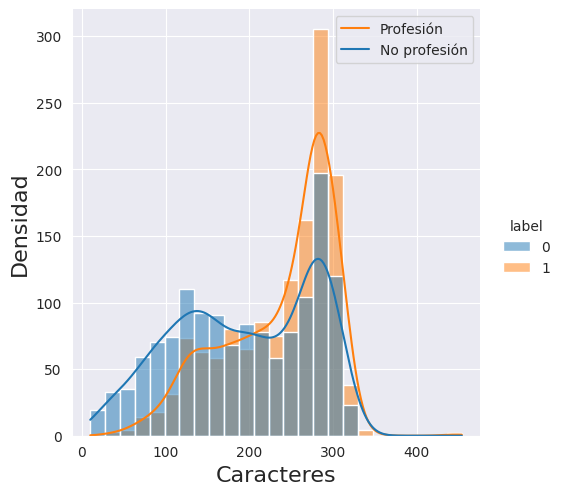

In [12]:
# Creo una copia del dataframe y agrego la nueva columna con lalongitud de caracteres
dataset_train_df_copy = dataset_train_df.copy()
dataset_train_df_copy["char_len"] = dataset_train_df_copy["text"].apply(lambda x: len(x))

# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset_train_df_copy, x="char_len", hue="label", kde=True, legend=True)
plt.legend(["Profesión", "No profesión"])
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Se observa que los tweets que mencionan una profesión (etiqueta 1) tienden a tener una mayor longitud en caracteres, con un pico concentrado alrededor de los 280 caracteres. Esto sugiere que dichos mensajes suelen acercarse al máximo permitido por la plataforma.
Por el contrario, los tweets sin mención de profesión (etiqueta 0) presentan una distribución más dispersa, con un pico más bajo y una mayor proporción de mensajes más cortos (entre 100 y 200 caracteres).
Esta diferencia podría deberse a que las menciones profesionales requieren explicaciones más detalladas o contienen expresiones formales más extensas, mientras que los tweets más generales o informales (sin mención de profesión) tienden a ser más breves.

**Análisis de contenido de los tweets**

Para ello utiliza wordclouds

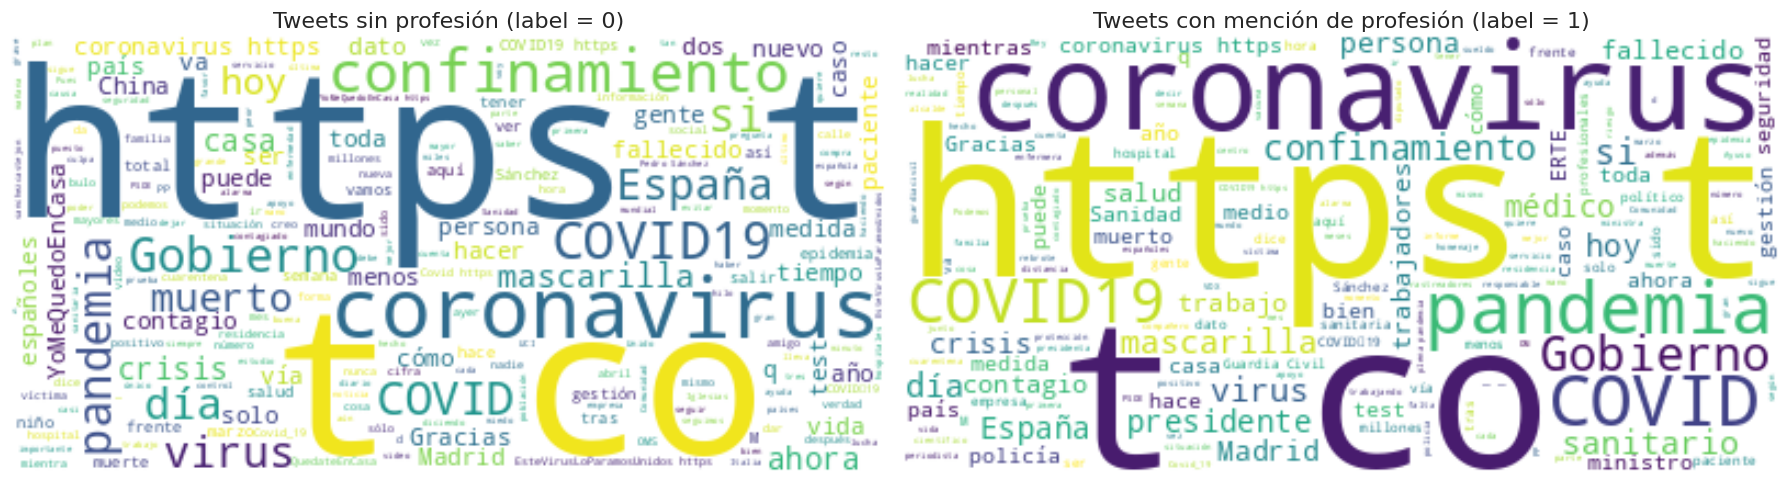

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Unimos los textos por categoría
txt_cat0 = " ".join(dataset_train_df_copy[dataset_train_df_copy.label == 0].text.to_list())
txt_cat1 = " ".join(dataset_train_df_copy[dataset_train_df_copy.label == 1].text.to_list())

# Stopwords en español
es_stopwords = stopwords.words('spanish')

# Creamos los wordclouds para cada clase
wordcloud_0 = WordCloud(background_color="white", max_words=5000,
                        contour_width=0, contour_color='steelblue',
                        stopwords=es_stopwords, normalize_plurals=True).generate(txt_cat0)

wordcloud_1 = WordCloud(background_color="white", max_words=5000,
                        contour_width=0, contour_color='orange',
                        stopwords=es_stopwords, normalize_plurals=True).generate(txt_cat1)

# Visualizamos ambos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].imshow(wordcloud_0, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Tweets sin profesión (label = 0)', fontsize=16)

axs[1].imshow(wordcloud_1, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Tweets con mención de profesión (label = 1)', fontsize=16)

plt.tight_layout()
plt.show()


El análisis de contenido mediante WordClouds revela que, aunque ambos grupos de tweets comparten un mismo contexto temático (pandemia, COVID-19), los tweets con mención de profesión tienden a incluir términos específicos asociados a ocupaciones, instituciones y actores sociales (como “médico”, “sanitario”, “trabajadores”, “presidente”,"policía" o "alcalde"), mientras que los tweets sin mención de profesión presentan un vocabulario más general o  o descriptivo(como por ejemplo: "día", "crisis", "muerto", "China", "paciente", vida, "persona", "contagio")

Esto sugiere que el contenido textual es informativo y diferenciador, y puede ser útil como feature en una futura tarea de clasificación.

Luego y a continuación, (y al igual que lo realizado en las ejercitaciones del módulo) desarrollaremos algunas tareas de procesamiento que posibiliten una mejor visualización de los elementos textuales presentes en el wordcloud.

In [14]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [15]:
from tqdm.notebook import tqdm
tqdm.pandas()
# Espacios
dataset_train_df_copy["normalized"] = dataset_train_df_copy["text"].progress_apply(lambda x: eliminar_espacios(x))
dataset_train_df_copy["normalized"] = dataset_train_df_copy["normalized"].progress_apply(lambda x: texto_to_lower(x))

  0%|          | 0/2786 [00:00<?, ?it/s]

  0%|          | 0/2786 [00:00<?, ?it/s]

In [16]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y números por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"):
            palabras[i] = "MENTION"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [17]:
dataset_train_df_copy["normalized"] = dataset_train_df_copy["normalized"].progress_apply(lambda x: normalizar_tokens(x))

  0%|          | 0/2786 [00:00<?, ?it/s]

In [18]:
import spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])
# Stopwords en español
es_stopwords = stopwords.words('spanish')

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in es_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
dataset_train_df_copy["preprocessed_text"] = dataset_train_df_copy["normalized"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

  0%|          | 0/2786 [00:00<?, ?it/s]

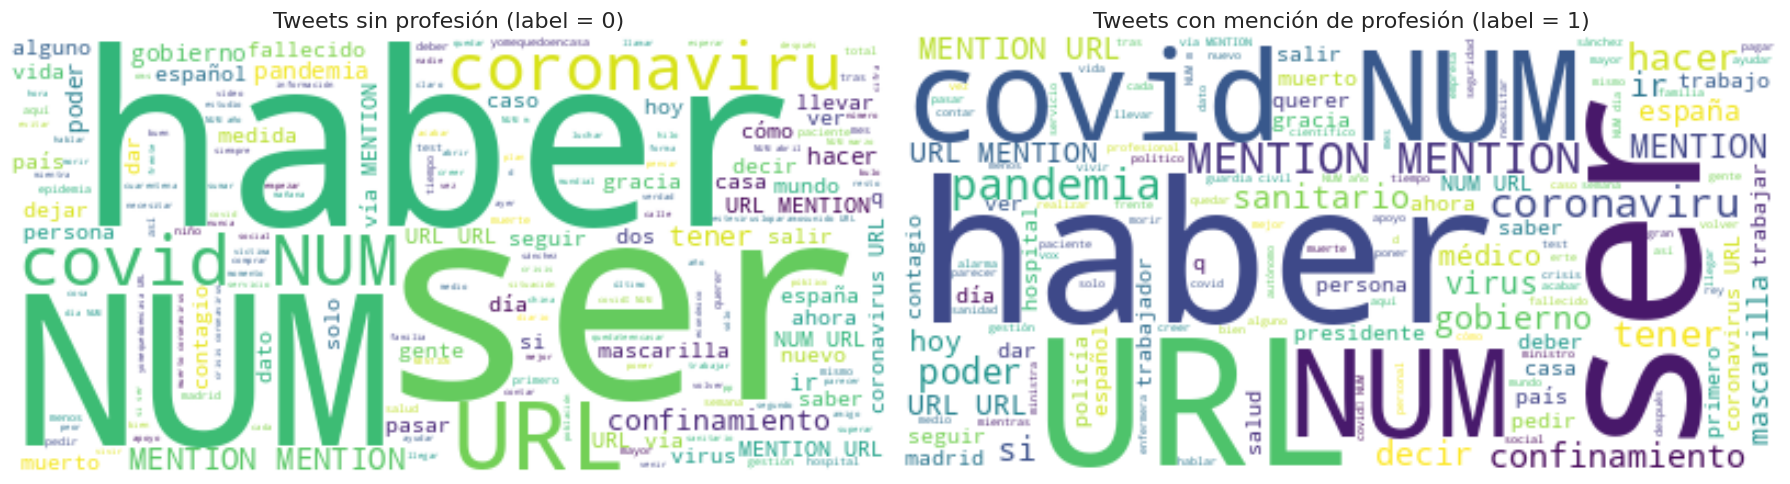

In [20]:
txt_cat0 = ",".join(dataset_train_df_copy[dataset_train_df_copy.label==0].preprocessed_text.to_list())
txt_cat1 = ",".join(dataset_train_df_copy[dataset_train_df_copy.label==1].preprocessed_text.to_list())
# Creamos los wordclouds para cada clase
wordcloud_0 = WordCloud(background_color="white", max_words=5000,
                        contour_width=0, contour_color='steelblue',
                        stopwords=es_stopwords, normalize_plurals=True).generate(txt_cat0)

wordcloud_1 = WordCloud(background_color="white", max_words=5000,
                        contour_width=0, contour_color='orange',
                        stopwords=es_stopwords, normalize_plurals=True).generate(txt_cat1)

# Visualizamos ambos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].imshow(wordcloud_0, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Tweets sin profesión (label = 0)', fontsize=16)

axs[1].imshow(wordcloud_1, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Tweets con mención de profesión (label = 1)', fontsize=16)

plt.tight_layout()
plt.show()


Con este último wordcloud más depurado podemos reforzar la conclusión que la mención de profesiones introduce una dimensión más institucional, crítica y especializada al discurso en Twitter durante la pandemia, mientras que su ausencia sugiere una narrativa más emocional, vivencial y social en los textos presentes en los tweets.

Por último, y para finalizar esta etapa de exploración y análisis de los datos, procedo a verificar la distribución idiomática de los textos de los tweets contenidos en el dataset de entrenamiento.

In [21]:
# Instalación del paquete 'langdetect' (solo necesario en notebooks o si no está instalado previamente)
!pip install langdetect
# Importación de la función 'detect' para detección de idioma
from langdetect import detect
import pandas as pd
from tqdm import tqdm

# Para ver una barra de progreso
tqdm.pandas()
# Ahora defino una función para detectar los idiomas de una serie de textos
def detect_language_full(texts):
    # Aplico la detección de idioma a cada texto, con barra de progreso
    langs = texts.progress_apply(lambda x: detect(x))
    # Esta línea me devuelve un conteo de cuántas veces aparece cada idioma
    return langs.value_counts()
# Aplico de la función sobre la columna 'text' del dataset de entrenamiento
detect_language_full(dataset_train_df["text"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=4a1d1462e7900737614885a0a416e2c697eb02b401dcb4c7a50a901bcfddd026
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


100%|██████████| 2786/2786 [00:29<00:00, 94.20it/s] 


text
es    2737
pt      25
en       6
ca       5
nl       2
et       2
lv       2
it       2
id       1
tl       1
sl       1
tr       1
de       1
Name: count, dtype: int64

Se observa que más del 98% de los tweets están redactados en idioma español. Este dato es relevante para la etapa de selección del modelo, ya que podría ser conveniente optar por un modelo preentrenado o especializado en procesamiento de texto en español.

## Tokenización

El texto del dataset no está preparado para ser introducido en un modelo Transformers. Lleva a cabo el proceso de tokenización.

In [22]:
# IMPORTS
from transformers import (
   AutoConfig,
   AutoTokenizer,
   AutoModelForSequenceClassification
)

from datasets import Dataset, DatasetDict, ClassLabel
from transformers import TrainingArguments
import evaluate
from transformers import Trainer

Selecciona un modelo apropiado para la tarea:

> Recuerda que en la siguiente celda sólo debes asignar un valor a model_name. No añadas más información en la celda.

In [23]:
#NO-MODIFY: VARIABLE NAME
model_name = 'sdadas/xlm-roberta-large-twitter'

### Justificación de la elección del modelo: `sdadas/xlm-roberta-large-twitter`

Para abordar la tarea de clasificación de textos en español provenientes de redes sociales, se optó por utilizar el modelo `sdadas/xlm-roberta-large-twitter`, una variante multilingüe del modelo XLM-RoBERTa adaptada y preentrenada específicamente sobre datos extraídos de Twitter. Esta elección se fundamenta en criterios empíricos, lingüísticos y técnicos que apuntan a maximizar el rendimiento del sistema en un dominio informal como el de los tweets.

#### 1. Adaptación al dominio de redes sociales

A diferencia de modelos entrenados sobre textos formales o generales, `xlm-roberta-large-twitter` ha sido específicamente adaptado a datos provenientes de Twitter, lo que incluye lenguaje informal, abreviaciones, hashtags, emojis y expresiones coloquiales. Esta sintonía con el dominio se traduce en una mayor capacidad para capturar los matices lingüísticos presentes en los tweets, lo cual resulta clave para mejorar la comprensión contextual y semántica en tareas de clasificación.

#### 2. Excelente rendimiento empírico en la tarea

El modelo fue evaluado frente a otras tres alternativas —incluyendo modelos específicos del idioma español y otros entrenados en el dominio de Twitter— bajo las mismas condiciones de experimentación. En los resultados, `sdadas/xlm-roberta-large-twitter` obtuvo el **mejor F1-score general** (`0.926`) y el **mayor recall** para la clase positiva (`0.95`), lo que lo convierte en la opción más efectiva para **maximizar la detección de los casos relevantes**, incluso en presencia de ruido lingüístico.

A continuación se presenta una tabla comparativa:

| Modelo                              | Accuracy | F1-score | Precisión (clase 1) | Recall (clase 1) | Tiempo (s) |
|-------------------------------------|----------|----------|----------------------|------------------|------------|
| `PlanTL-GOB-ES/roberta-base-bne`    | 0.963    | 0.922    | 0.93                 | 0.92             | 26         |
| **`sdadas/xlm-roberta-large-twitter`** | **0.964** | **0.926** | 0.90                 | **0.95**         | 85         |
| `Twitter/twhin-bert-large`          | 0.941    | 0.880    | 0.85                 | 0.91             | 22         |
| `Twitter/twhin-bert-base`           | 0.912    | 0.838    | 0.75                 | 0.96             | 286        |

El modelo logra un rendimiento equilibrado y sobresaliente: precisión alta (0.90), recall muy alto (0.95) y excelente F1-score, lo que permite capturar correctamente la mayoría de los casos positivos sin un aumento excesivo de falsos positivos.

#### 3. Arquitectura avanzada y robusta

El modelo se basa en `XLM-RoBERTa-large`, una arquitectura Transformer, del tipo Encoder, robusta que combina el poder de RoBERTa con entrenamiento multilingüe sobre datos masivos. Esta arquitectura ha demostrado ser altamente efectiva en tareas multilingües y de transferencia de dominio, especialmente cuando se dispone de textos informales o con ruido, como es el caso de Twitter.

#### 4. Viabilidad práctica

Si bien el tiempo de inferencia de `sdadas/xlm-roberta-large-twitter` (85 segundos) es superior al de otros modelos, sigue siendo perfectamente viable en entornos como Google Colab con GPU T4, siempre que se ajusten parámetros como el tamaño de batch. Dado el rendimiento superior alcanzado, este costo computacional adicional se justifica ampliamente.

---

### Conclusión

El modelo `sdadas/xlm-roberta-large-twitter` demostró ser la mejor alternativa en esta tarea de clasificación de tweets por su **excelente rendimiento empírico**, su **especialización en el dominio de redes sociales** y su **alta capacidad para detectar casos positivos**, incluso ante variaciones lingüísticas propias de los tweets. Esta combinación lo convierte en una opción robusta y adecuada para tareas similares en el ámbito del PLN aplicado a redes sociales.

Puedes continuar con el proceso aquí:

In [24]:
# Crear copia y renombrar la columna "label" a "labels"
train_dataset = Dataset.from_pandas(dataset_train_df.rename(columns={"label": "labels"}))
# Convertir columna "labels" a tipo ClassLabel (2 clases: 0 = No mención, 1 = Mención)
train_dataset = train_dataset.cast_column("labels", ClassLabel(num_classes=2))
val_dataset = Dataset.from_pandas(dataset_val_df.rename(columns={"label": "labels"}))
val_dataset = val_dataset.cast_column("labels", ClassLabel(num_classes=2))
test_dataset = Dataset.from_pandas(dataset_test_df)

Casting the dataset:   0%|          | 0/2786 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/999 [00:00<?, ? examples/s]

En la siguiente celda se define una función de preprocesamiento que tokeniza los textos del dataset utilizando el tokenizer correspondiente al modelo seleccionado (`sdadas/xlm-roberta-large-twitter`).  
La tokenización convierte el texto en una secuencia de tokens (números enteros) que el modelo puede interpretar.

La función `preprocess_function` realiza las siguientes tareas:
- Aplica la tokenización sobre el campo `'text'` de cada elemento.
- Aplica padding para que todas las secuencias tengan la misma longitud (`padding="max_length"`).
- Recorta las secuencias largas para que no superen la longitud máxima permitida (`truncation=True`).

Luego, esta función se aplica a los datasets de entrenamiento (`train_dataset`), validación (`val_dataset`) y prueba (`test_dataset`) utilizando el método `.map()`, que transforma el dataset aplicando la función a cada elemento.

In [25]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(examples):
    # Tokenizar el texto
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Map:   0%|          | 0/2786 [00:00<?, ? examples/s]

Map:   0%|          | 0/999 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

## Fine-tuning

### Definición del modelo para Fine-Tuning

En esta sección se prepara el modelo de lenguaje para una tarea de clasificación de secuencias.

- Se importarán las bibliotecas `AutoModelForSequenceClassification`, que permite cargar un modelo compatible con tareas de clasificación de texto.
- Se definen los diccionarios `id2label` y `label2id` para mapear los identificadores numéricos de clase con sus etiquetas textuales:
  - `0` → `"NO_PROFESIÓN"`
  - `1` → `"PROFESIÓN"`

Luego, se carga el modelo usando `from_pretrained(model_name)` especificando:
- `num_labels=2`: porque se trata de una clasificación binaria.
- `id2label` y `label2id`: para que el modelo pueda entender y devolver etiquetas con nombres legibles en lugar de solo índices numéricos.

Este modelo será posteriormente afinado (*fine-tuned*) sobre el dataset etiquetado para que aprenda a distinguir entre textos que contienen o no una profesión.

Carga el model para ser ajustado posteriormente:

In [26]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

id2label = {0: "NO_PROFESIÓN", 1: "PROFESIÓN"}
label2id = {"NO_PROFESIÓN": 0, "PROFESIÓN": 1}
model = AutoModelForSequenceClassification.from_pretrained(model_name,  num_labels=2, id2label=id2label, label2id=label2id)

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at sdadas/xlm-roberta-large-twitter and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Configuracion training_args

### Configuración de los argumentos de entrenamiento

Se definen, a continuación, los parámetros de entrenamiento mediante la clase `TrainingArguments`, que controla cómo se entrena el modelo.

Los principales parámetros establecidos son:

- `output_dir="modelo_test"`: carpeta donde se guardarán los checkpoints del modelo.
- `learning_rate=2e-5`: tasa de aprendizaje del optimizador.
- `per_device_train_batch_size=8`: tamaño del batch para entrenamiento por dispositivo.
- `per_device_eval_batch_size=8`: tamaño del batch para evaluación por dispositivo.
- `num_train_epochs=4`: número total de épocas de entrenamiento.
- `weight_decay=0.1`: coeficiente de regularización para evitar sobreajuste.
- `eval_strategy="steps"`: la evaluación se realiza cada cierta cantidad de pasos.
- `save_strategy="steps"`: se guarda un checkpoint del modelo cada cierto número de pasos.
- `eval_steps=50`: se evalúa el modelo cada 50 pasos.
- `logging_strategy="steps"` y `logging_steps=50`: se registra información en el log cada 50 pasos.
- `load_best_model_at_end=True`: al finalizar, se carga el modelo con mejor desempeño según las métricas de evaluación.
- `push_to_hub=False`: no se sube el modelo a Hugging Face Hub.
- `report_to="none"`: no se reporta a plataformas externas como WandB.
- `seed=52`: semilla fija para reproducibilidad.

Configura los parámetros de entrenamiento del modelo.


>

> Recuerda que en la siguiente celda sólo debes asignar atributos a la variable training_args. No añadas  otras variables en la celda

In [27]:
#NO-MODIFY: VARIABLE NAME
training_args = TrainingArguments(output_dir="modelo_test",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.1,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=50,
    logging_strategy="steps",
    logging_steps=50,
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to="none",
    seed=52
)

### Métricas de evaluación

### Definición de métricas de evaluación: Accuracy y F1 Score

Se importan las métricas `accuracy` y `f1` desde la biblioteca `evaluate`, que permite calcular indicadores de desempeño para modelos de machine learning.

Se define la función `compute_metrics(eval_pred)` que será utilizada por el `Trainer` durante el entrenamiento y la validación para evaluar el rendimiento del modelo.

La función realiza los siguientes pasos:

- Se reciben los `eval_pred`, que contienen:
  - `predictions`: probabilidades o logits predichos por el modelo.
  - `labels`: etiquetas reales.
- Se aplica `np.argmax` para obtener las clases predichas (el índice con mayor probabilidad para cada muestra).
- Se calcula:
  - **Accuracy**: proporción de predicciones correctas.
  - **F1 Score**: métrica armónica entre precisión y recall, útil especialmente en casos de clases desbalanceadas.

Finalmente, se retorna un diccionario con ambas métricas, que serán registradas automáticamente durante el entrenamiento y la evaluación del modelo.

Define las métricas de evaluación

In [28]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1_score = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_value = accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1_score_value = f1_score.compute(predictions=predictions, references=labels)["f1"]

    return {
        "accuracy": accuracy_value,
        "f1_score": f1_score_value,
    }



### Ajuste del modelo

### Configuración del objeto Trainer

Se crea una instancia de `Trainer`, que se encarga de gestionar el ciclo completo de entrenamiento, evaluación y guardado del modelo.

Parámetros utilizados:

- `model`: modelo de clasificación de texto previamente cargado y configurado.
- `args`: argumentos de entrenamiento definidos en `training_args`.
- `train_dataset`: conjunto de datos de entrenamiento ya tokenizado.
- `eval_dataset`: conjunto de validación usado para evaluar el modelo durante el entrenamiento.
- `tokenizer`: el tokenizador asociado al modelo, necesario para preparar los datos correctamente.
- `compute_metrics`: función definida previamente para calcular métricas de desempeño (accuracy y F1).

Nota: En el código se sugiere la posibilidad de incluir una función de *early stopping* (comentada), usando:
```python
callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]

Lleva a cabo el ajuste del modelo:

In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    #callbacks=[EarlyStoppingCallback(early_stopping_patience=2) # Podriamoshacer une arly stop
)

/tmp/ipython-input-29-1224057041.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


### Ejecución del entrenamiento del modelo

Se inicia el proceso de entrenamiento del modelo con la instrucción:

In [30]:
trainer.train()

TrainOutput(global_step=1396, training_loss=0.18109960170905706, metrics={'train_runtime': 6249.6349, 'train_samples_per_second': 1.783, 'train_steps_per_second': 0.223, 'total_flos': 1.0385443112927232e+16, 'train_loss': 0.18109960170905706, 'epoch': 4.0})

In [31]:
trainer.save_model("output_model_save")

## Evaluacion

Una vez llevada a cabo el entrenamiento, realiza la evaluación del modelo.

In [32]:
trainer.evaluate(val_dataset)


{'eval_loss': 0.293468177318573,
 'eval_accuracy': 0.958958958958959,
 'eval_f1_score': 0.9171717171717172,
 'eval_runtime': 82.8647,
 'eval_samples_per_second': 12.056,
 'eval_steps_per_second': 1.508,
 'epoch': 4.0}

### Evaluación del modelo al finalizar el entrenamiento

Esta evaluación proporciona información clave sobre el rendimiento del modelo en el conjunto de validación una vez completadas las cuatro épocas de entrenamiento. Los resultados obtenidos fueron:

- **eval_loss: 0.2935** → representa la pérdida del modelo sobre el conjunto de validación. Valores más bajos indican un mejor ajuste del modelo a los datos sin sobreajuste.
  
- **eval_accuracy: 0.959** → aproximadamente el **95.9%** de las predicciones realizadas por el modelo fueron correctas.

- **eval_f1_score: 0.917** → valor del F1 Score, métrica que combina precisión y recall. Es especialmente útil en contextos con clases desbalanceadas, ya que resume el rendimiento del modelo en una sola cifra.

- **eval_runtime: 82.86 segundos** → tiempo total que llevó realizar la evaluación sobre el conjunto de validación.

- **eval_samples_per_second: 12.06** → cantidad promedio de muestras procesadas por segundo durante la evaluación.

- **eval_steps_per_second: 1.51** → velocidad promedio de procesamiento por batch.

- **epoch: 4.0** → número total de épocas completadas, de acuerdo con la configuración del entrenamiento.

Este análisis complementa las métricas de la matriz de confusión y permite evaluar la eficacia general del modelo en datos no vistos, sirviendo como referencia para comparar con futuros ajustes o experimentos.

In [33]:
#Se obtienen las predicciones del modelo sobre el dataset de validación con:
predictions = trainer.predict(val_dataset)

### Análisis detallado de las predicciones con métricas y matriz de confusión

Después de obtener las predicciones del modelo, se procesan para comparar con las etiquetas reales:

- `y_pred`: etiquetas predichas, obtenidas aplicando `argmax` a los logits del modelo.
- `y_true`: etiquetas reales extraídas del dataset de validación.

Se usan funciones de `scikit-learn` para evaluar el desempeño:

- `confusion_matrix(y_true, y_pred)`: muestra la matriz de confusión, donde:
  - La diagonal representa las predicciones correctas.
  - Los valores fuera de la diagonal indican errores de clasificación.

- `classification_report(y_true, y_pred)`: muestra un reporte con:
  - **Precision**: proporción de verdaderos positivos entre todas las predicciones positivas.
  - **Recall**: proporción de verdaderos positivos entre todas las muestras positivas reales.
  - **F1-score**: media armónica entre precision y recall.
  - **Support**: cantidad de muestras reales para cada clase.

In [34]:
y_pred = predictions.predictions.argmax(axis=1)
y_true = [x["labels"] for x in val_dataset]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[731  30]
 [ 11 227]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       761
           1       0.88      0.95      0.92       238

    accuracy                           0.96       999
   macro avg       0.93      0.96      0.94       999
weighted avg       0.96      0.96      0.96       999



### Análisis de la matriz de confusión y métricas de clasificación

La matriz de confusión indica que:

- **731 muestras** de la clase 0 fueron **correctamente clasificadas** como clase 0.
- **30 muestras** de la clase 0 fueron **incorrectamente clasificadas** como clase 1.
- **11 muestras** de la clase 1 fueron **incorrectamente clasificadas** como clase 0.
- **227 muestras** de la clase 1 fueron **correctamente clasificadas** como clase 1.

El reporte de métricas muestra lo siguiente:

- **Alta precisión (0.99)** y **recall (0.96)** para la clase 0 (*No Profesión*), lo que indica que el modelo identifica muy bien los ejemplos negativos.
- Para la clase 1 (*Profesión*), se observa una **precisión elevada (0.88)** y un **recall igualmente alto (0.95)**, lo cual refleja una excelente capacidad del modelo para detectar menciones de profesiones con pocos falsos negativos.
- La **exactitud general del modelo** es del **96%**, y el **F1-score para la clase 1** es **0.92**, lo que confirma un rendimiento robusto y equilibrado.

Este análisis cualitativo complementa las métricas globales, permitiendo entender **dónde y cómo se producen los errores de clasificación**, así como las fortalezas del modelo en ambas clases.


## Genera predicciones

Genera predicciones sobre el test set. Recuerda que el archivo que generes y adjuntes al ejercicio debe tener dos columnas:


| id         | label |
|------------|-------|
| 1234567890 | 1     |
| 1234567891 | 0     |
| 1234567892 | 0     |
| 1234567893 | 1     |

- El archivo debe estar en formato **TSV** (separado por tabuladores).
- Debe contener exactamente **dos columnas**: `id` y `label`.
- Es obligatorio incluir la **cabecera**.


In [36]:
test_dataset = test_dataset.remove_columns("label")
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Crear DataFrame y guardar
output_df = dataset_test_df.copy()
output_df["label"] = predicted_labels
output_df = output_df.rename(columns={"tweet_id": "id"})
output_df[["id", "label"]].to_csv("FERNÁNDEZ_MAURO_ejercicio1_predicciones.tsv", sep="\t", index=False)

En esta última sección se realizó la predicción de etiquetas para el conjunto de test, que no tiene etiquetas disponibles para su evaluación directa.

Pasos principales:

- Se eliminó la columna `"label"` del dataset de test, ya que el dataset poseía el valor -1 asignado de forma obligatoria debido a los requerimientos de HuggingFace, mas no corresponden dado que precisamente esos valores se desean predecir.
  
- Se ejecuta `trainer.predict(test_dataset)` para obtener las predicciones del modelo.

- Se crea un nuevo DataFrame `output_df` a partir de `dataset_test_df` (una copia de los datos originales del test), al que se le añade la columna `"label"` con las predicciones generadas.

- Finalmente, se exporta un archivo `.tsv` llamado `"FERNÁNDEZ_MAURO_ejercicio1_predicciones.tsv"` con dos columnas:
  - `"id"`: identificador único de cada muestra.
  - `"label"`: etiqueta predicha por el modelo.

Este archivo luego se adjunta para la entrega de las predicciones de la tarea/evaluación.
